In [2]:
!pip install mediapipe
!pip install  cvzone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=7f71dcd213494815dacd250cacb90d25f6dfaf38f30002fca226e69893cca451
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


##Media pipe line

In [2]:
import os
import pickle

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

[landmark {
  x: 0.486544549
  y: 0.872690618
  z: 6.31848479e-07
}
landmark {
  x: 0.59898752
  y: 0.773375928
  z: -0.0780114233
}
landmark {
  x: 0.643287659
  y: 0.58814764
  z: -0.0958537385
}
landmark {
  x: 0.546081543
  y: 0.455039948
  z: -0.103700832
}
landmark {
  x: 0.428901553
  y: 0.402851343
  z: -0.108045012
}
landmark {
  x: 0.619287372
  y: 0.44303593
  z: -0.0248727202
}
landmark {
  x: 0.610980332
  y: 0.27391398
  z: -0.0536035709
}
landmark {
  x: 0.590126276
  y: 0.172277674
  z: -0.0853001
}
landmark {
  x: 0.569333911
  y: 0.0842341483
  z: -0.111775637
}
landmark {
  x: 0.528791666
  y: 0.435813427
  z: -0.0151569629
}
landmark {
  x: 0.516213477
  y: 0.250936151
  z: -0.0380543806
}
landmark {
  x: 0.501977384
  y: 0.133559972
  z: -0.0691164732
}
landmark {
  x: 0.489216983
  y: 0.039568007
  z: -0.0935159475
}
landmark {
  x: 0.451025784
  y: 0.461954057
  z: -0.0169915687
}
landmark {
  x: 0.432653815
  y: 0.289841801
  z: -0.0467736088
}
landmark {
  x: 0

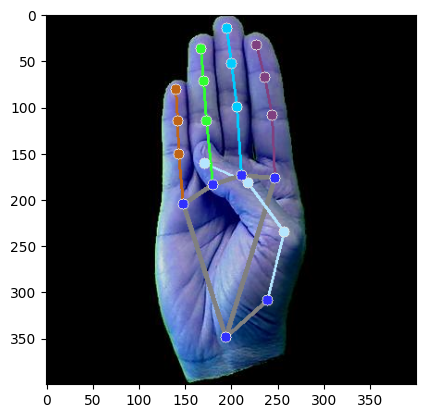

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

img = cv2.imread("/content/b1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = hands.process(img_rgb)

print(results.multi_hand_landmarks)

for hand_landmark in results.multi_hand_landmarks:
  h, w, _ = img_rgb.shape
  print(h,w)

  print(hand_landmark.landmark)
    # Extract and print the coordinates of each landmark point
  for i, landmark in enumerate(hand_landmark.landmark):
      x, y, z = int(landmark.x * w), int(landmark.y * h), landmark.z
      print(f"Landmark {i}: (x: {x}, y: {y}, z: {z})")


  mp_drawing.draw_landmarks(
      img,#image
      hand_landmark, #model output
      mp_hands.HAND_CONNECTIONS,#hand connection
      mp_drawing_styles.get_default_hand_landmarks_style(),
      mp_drawing_styles.get_default_hand_connections_style())

plt.imshow(img)
plt.show()

###Crop the detect image

140 15 257 349


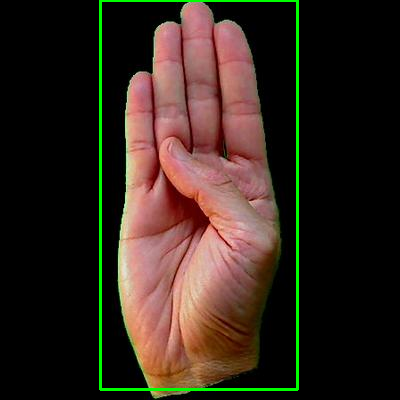

<class 'mediapipe.python.solution_base.SolutionOutputs'>


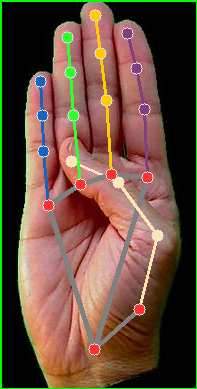

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Hands and drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Initialize the Hands model
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

# Read an image
image_path = '/content/hand1_b_left_seg_1_cropped.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect hand landmarks
results = hands.process(image_rgb)
cutoff = 40
# Check if any hands are detected
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Get the landmarks
        landmarks = hand_landmarks.landmark
        #print(landmarks)
        h, w, _ = image.shape

        # Initialize bounding box coordinates
        min_x, min_y = w, h
        max_x, max_y = 0, 0

        # Iterate through landmarks to find the bounding box
        for landmark in landmarks:
            x, y = int(landmark.x * w), int(landmark.y * h)
            min_x, min_y = min(min_x, x), min(min_y, y)
            max_x, max_y = max(max_x, x), max(max_y, y)
        print(min_x,min_y,max_x,max_y)

        #Define X Y margine
        if min_x-cutoff < 0:
          minx=0
        else:
          minx=min_x-cutoff

        if min_y-cutoff < 0:
          miny=0
        else:
          miny=min_y-cutoff

        if max_x+cutoff > w:
          maxx=max_x
        else:
          maxx=max_x+cutoff

        if max_y+cutoff > h:
          maxy=max_y
        else:
          maxy=max_y+cutoff

        # Draw the bounding box
        cv2.rectangle(image, (minx, miny), (maxx, maxy), (0, 255, 0), 2)
        cv2_imshow(image)
        # Crop the image to the bounding box
        cropped_image = image[miny:maxy,minx:maxx]

        # Optional: Draw landmarks and connections
        mp_drawing.draw_landmarks(
            image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

print(results)# Display the output image with bounding box
cv2_imshow(cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


###Data collection CVE

In [ ]:

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

##Data Collection for image

In [3]:
import os
import pickle
import numpy as np

import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image


In [13]:
def resize_with_padding(image, desired_size):
    # Load the image
    #image = cv2.imread(image_path)

    # Get the current dimensions
    h, w = image.shape[:2]

    # Calculate the aspect ratio
    aspect_ratio = w / h
    # Determine new dimensions keeping the aspect ratio
    if aspect_ratio > 1:  # width is greater than height
        new_w = desired_size[0]
        new_h = int(new_w / aspect_ratio)
    elif aspect_ratio == 1:
        new_w = desired_size[0]
        new_h = desired_size[0]
    else:  # height is greater than width
        new_h = desired_size[1]
        new_w = int(new_h * aspect_ratio)

    # Resize the image
    resized_image = cv2.resize(image, (new_w, new_h))

    # Calculate padding to make the image the desired size
    delta_w = desired_size[0] - new_w
    delta_h = desired_size[1] - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    # Pad the image
    color = [0,0,0]  # Padding color (white)
    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return padded_image

In [14]:


# Initialize MediaPipe Hands and drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

cutoff=30
desired_size=(300,300,3)


#x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
#y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

#define x y storage location
x_lists = {}
y_lists = {}
z_lists = {}

for i in range(0, 21):
    x_lists[f'x{i}'] = []
    y_lists[f'y{i}'] = []
    z_lists[f'z{i}'] = []

label=[]

# Initialize the Hands model
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.3)

root_folder='/content/drive/MyDrive/Work_space/Project/sign_language/ML_dev/dataset/asl_dataset'

for folder in os.listdir(root_folder):

  for file in os.listdir(os.path.join(root_folder,folder)):
      #print(os.path.join(root_folder,folder,file))
      image_path=os.path.join(root_folder,folder,file)
      file_name=image_path.split("/")[-1]
      print(file_name)


      # Read an image
      #image_path = '/content/hand1_b_left_seg_1_cropped.jpeg'
      image = cv2.imread(image_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      #cv2_imshow(image_rgb)

      # Process the image to detect hand landmarks
      results = hands.process(image_rgb)

      # Check if any hands are detected
      if results.multi_hand_landmarks:
          for hand_landmarks in results.multi_hand_landmarks:
              # Get the landmarks
              landmarks = hand_landmarks.landmark
              #print(landmarks)
              h, w, _ = image_rgb.shape
              #print(h,w)

              for i, landmark in enumerate(landmarks):
                  x, y, z = int(landmark.x * w), int(landmark.y * h), int(landmark.z*100)
                  #print(f"Landmark {i}: (x: {x}, y: {y}, z: {z})")

              # Initialize bounding box coordinates
              min_x, min_y = w, h
              max_x, max_y = 0, 0

              # Iterate through landmarks to find the bounding box
              for landmark in landmarks:
                  x, y = int(landmark.x * w), int(landmark.y * h)
                  min_x, min_y = min(min_x, x), min(min_y, y)
                  max_x, max_y = max(max_x, x), max(max_y, y)



              #Define X Y margine
              if min_x-cutoff < 0:
                minx=0
              else:
                minx=min_x-cutoff

              if min_y-cutoff < 0:
                miny=0
              else:
                miny=min_y-cutoff

              if max_x+cutoff > w:
                maxx=max_x
              else:
                maxx=max_x+cutoff

              if max_y+cutoff > h:
                maxy=max_y
              else:
                maxy=max_y+cutoff

              # Draw the bounding box
              #cv2.rectangle(image_rgb , (minx, miny), (maxx, maxy), (0, 255, 0), 2)
              #cv2_imshow(image)

              # Crop the image to the bounding box
              cropped_image = image_rgb [miny:maxy,minx:maxx]
              #cv2_imshow(cropped_image)

              #resize image
              resize_image=resize_with_padding(cropped_image, desired_size)

              ##############GEt needa the land mark in image#######################

              # Process the image to detect hand landmarks
              results2 = hands.process(resize_image)

              # Check if any hands are detected
              if results2.multi_hand_landmarks:
                print("ok")

                for hand_landmarks2 in results2.multi_hand_landmarks:
                    # Get the landmarks
                    landmarks2 = hand_landmarks2.landmark
                    #print(landmarks)
                    h2, w2, _ = resize_image.shape
                    #print(h2,w2)

                    label.append(folder)

                    for i, landmark in enumerate(landmarks2):
                      if f'x{i}' in x_lists and f'y{i}' in y_lists:
                          x, y, z = int(landmark.x * w2), int(landmark.y * h2), int(landmark.z*100)
                          x_lists[f'x{i}'].append(x)
                          y_lists[f'y{i}'].append(y)
                          z_lists[f'z{i}'].append(z)

                          #print(f"Landmark {i}: (x: {x}, y: {y}, z: {z})")

                    # Optional: Draw landmarks and connections
                    mp_drawing.draw_landmarks(
                        resize_image,hand_landmarks2, mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style())

                    ####Save the proceed image######
                    # Define the parent folder and child folder
                    #parent_folder = "/content/proceed_image"
                    #child_folder = os.path.join(parent_folder,folder)

                    # Create the child folder if it doesn't exist
                    #os.makedirs(child_folder, exist_ok=True)

                    # Define the path to save the image
                    #image_path = os.path.join(child_folder, file_name)

                    # Save the image
                    #cv2.imwrite(image_path,resize_image)

                    # Display the output image with bounding box
                    #plt.imshow(resize_image)
                    #plt.show()


hand1_0_bot_seg_2_cropped.jpeg
hand1_0_bot_seg_1_cropped.jpeg
hand1_0_bot_seg_3_cropped.jpeg
hand1_0_bot_seg_4_cropped.jpeg
hand1_0_bot_seg_5_cropped.jpeg
ok
hand1_0_dif_seg_1_cropped.jpeg
hand1_0_dif_seg_2_cropped.jpeg
hand1_0_dif_seg_3_cropped.jpeg
hand1_0_dif_seg_4_cropped.jpeg
ok
hand1_0_dif_seg_5_cropped.jpeg
hand1_0_left_seg_1_cropped.jpeg
hand1_0_left_seg_2_cropped.jpeg
hand1_0_left_seg_3_cropped.jpeg
hand1_0_left_seg_4_cropped.jpeg
hand1_0_left_seg_5_cropped.jpeg
hand1_0_right_seg_1_cropped.jpeg
hand1_0_right_seg_3_cropped.jpeg
hand1_0_right_seg_2_cropped.jpeg
hand1_0_right_seg_4_cropped.jpeg
hand1_0_right_seg_5_cropped.jpeg
hand1_0_top_seg_1_cropped.jpeg
hand1_0_top_seg_2_cropped.jpeg
hand1_0_top_seg_3_cropped.jpeg
ok
hand1_0_top_seg_4_cropped.jpeg
hand1_0_top_seg_5_cropped.jpeg
hand2_0_bot_seg_1_cropped.jpeg
ok
hand2_0_bot_seg_2_cropped.jpeg
ok
hand2_0_bot_seg_3_cropped.jpeg
ok
hand2_0_bot_seg_4_cropped.jpeg
ok
hand2_0_dif_seg_1_cropped.jpeg
hand2_0_dif_seg_2_cropped.jpeg
ok


In [15]:
print(z_lists["z2"])

[1, 9, -22, -40, -19, 18, 20, 3, 17, -6, -29, -1, -2, 0, -13, -14, -13, -11, -13, -13, -12, -11, -11, -9, -13, -10, -13, -9, -10, -15, -11, -12, -10, -10, -9, -13, -10, -11, -12, -10, -10, -12, -15, -11, -11, -11, -10, -11, -13, -11, -15, -12, -13, -12, -9, -9, -11, -11, -14, -19, -15, -11, -10, -11, -12, -13, -16, -12, -18, -14, -12, -16, -15, -14, -15, -13, -14, -19, -12, -10, -12, -13, -17, -10, -11, -11, -9, -13, -10, -17, -17, -13, -9, -11, -11, -9, -10, -13, -11, -14, -9, -10, -12, -10, -11, -10, -10, -10, -9, -9, -9, -9, -9, -17, -14, -21, -10, -10, -5, -10, -11, -12, -10, -10, -9, -10, -14, -12, -6, -6, -10, -6, -10, -5, -4, -9, -12, -4, -14, -10, -10, -12, -12, -12, -11, -9, -5, -14, -8, -7, -2, -13, -7, -10, -7, -6, -4, -13, -7, -11, -10, -8, -4, -2, -2, -9, -8, -6, -8, -10, -17, -2, -2, -13, -11, -10, -12, -18, -11, -5, -10, -4, -8, -4, -8, -8, -6, -13, -1, -12, -10, -9, -2, -6, -9, -13, -14, -16, -11, -8, -9, -10, -11, -13, -11, -13, -13, -13, -12, -13, -16, -13, -11, -13, 

In [16]:
import pandas as pd

df_y=pd.DataFrame(y_lists)
df_x=pd.DataFrame(x_lists)
df_z=pd.DataFrame(z_lists)
df_label=pd.DataFrame(label)

df=pd.concat([df_x,df_y,df_z,df_label],axis=1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x0      1480 non-null   int64 
 1   x1      1480 non-null   int64 
 2   x2      1480 non-null   int64 
 3   x3      1480 non-null   int64 
 4   x4      1480 non-null   int64 
 5   x5      1480 non-null   int64 
 6   x6      1480 non-null   int64 
 7   x7      1480 non-null   int64 
 8   x8      1480 non-null   int64 
 9   x9      1480 non-null   int64 
 10  x10     1480 non-null   int64 
 11  x11     1480 non-null   int64 
 12  x12     1480 non-null   int64 
 13  x13     1480 non-null   int64 
 14  x14     1480 non-null   int64 
 15  x15     1480 non-null   int64 
 16  x16     1480 non-null   int64 
 17  x17     1480 non-null   int64 
 18  x18     1480 non-null   int64 
 19  x19     1480 non-null   int64 
 20  x20     1480 non-null   int64 
 21  y0      1480 non-null   int64 
 22  y1      1480 non-null   

In [18]:
df.to_csv("data_sign1_2.csv",index=False)

In [20]:
import subprocess

# Set environment variables and run the scp command
command = "scp -r /content/data_sign1_2.csv '/content/drive/MyDrive/Work_space/Project/sign_language/ML_dev/dataset/asl_dataset'"
process = subprocess.Popen(command, shell=True, env={"LC_ALL": "C.UTF-8", "LANG": "C.UTF-8"})
process.wait()

0